# Собственные значения и собственные векторы

Собственные значения и собственные векторы являются важными концепциями в линейной алгебре и имеют множество приложений в науке и инженерии, включая машинное обучение.

**Собственный вектор** матрицы $ A $ — это ненулевой вектор $ \mathbf{v} $, который изменяется только на скалярный множитель $ \lambda $ (собственное значение) при умножении на матрицу $ A $:
$ A \mathbf{v} = \lambda \mathbf{v} $

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Определяем квадратную матрицу
A = np.array([[4, -2],
              [1, 1]])

# Вычисляем собственные значения и собственные векторы
eigenvalues, eigenvectors = np.linalg.eig(A)

# Выводим собственные значения и собственные векторы
print("Собственные значения:")
print(eigenvalues)
print("\nСобственные векторы:")
print(eigenvectors)

Собственные значения:
[3. 2.]

Собственные векторы:
[[0.89442719 0.70710678]
 [0.4472136  0.70710678]]


### Визуализация собственных векторов

Теперь создадим визуализацию, показывающую векторы и их изменения под действием матрицы $ A $.

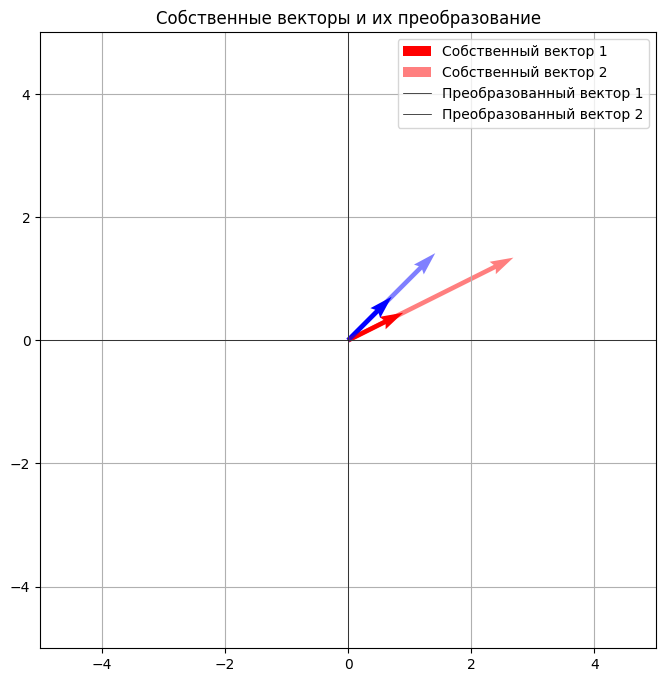

In [3]:
# Визуализация собственных векторов
fig, ax = plt.subplots(figsize=(8, 8))

# Определяем начало координат для стрелок
origin = np.array([[0, 0], [0, 0]])

# Отображаем собственные векторы
ax.quiver(*origin, eigenvectors[0, :], eigenvectors[1, :], color=['r', 'b'], angles='xy', scale_units='xy', scale=1, label=['Собственный вектор 1', 'Собственный вектор 2'])

# Применение матрицы A к собственным векторам (для проверки)
transformed_vectors = A @ eigenvectors

# Отображаем преобразованные собственные векторы с изменённым alpha-каналом
ax.quiver(*origin, transformed_vectors[0, :], transformed_vectors[1, :], angles='xy', scale_units='xy', scale=1, color=['r', 'b'], alpha=0.5, label=['Преобразованный вектор 1', 'Преобразованный вектор 2'])

# Настройки графика
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.grid(True)
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
ax.set_aspect('equal')
ax.legend(['Собственный вектор 1', 'Собственный вектор 2', 'Преобразованный вектор 1', 'Преобразованный вектор 2'])

plt.title("Собственные векторы и их преобразование")
plt.show()

Генерируем случайные данные, которые имеют многомерное нормальное распределение. Эти данные могут представлять любой реальный набор данных, например, измерения различных характеристик объектов.

Матрица ковариаций показывает, как два переменные изменяются совместно. Она нужна для понимания структурных связей между любыми двумя переменными в данных.

1. Собственные значения и векторы вычисляются из матрицы ковариаций. Это ключевые компоненты PCA.
2. Собственные значения показывают, какая доля дисперсии данных объясняется каждой главной компонентой.
3. Собственные векторы (главные компоненты) показывают направление максимальной дисперсии в данных.

Матрица ковариаций:
[[3.15301643 1.26306239]
 [1.26306239 2.36028153]]

Собственные значения:
[4.08044418 1.43285377]

Собственные векторы:
[[ 0.80604513 -0.59185408]
 [ 0.59185408  0.80604513]]


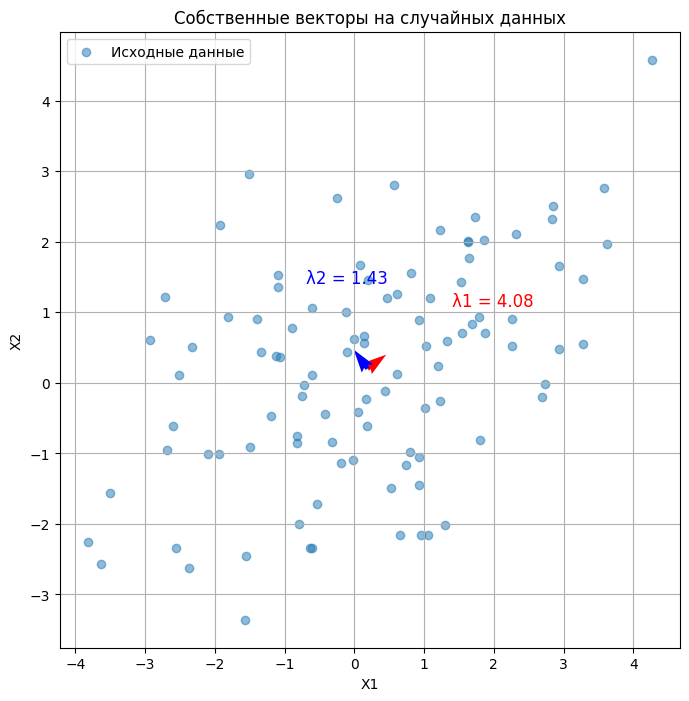


Доля объясненной дисперсии каждой компонентой:
Компонента 1: 0.74
Компонента 2: 0.26


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Создание случайных данных
np.random.seed(42)
X = np.random.multivariate_normal([0, 0], [[4, 2], [2, 3]], size=100)

# Вычисление матрицы ковариаций
cov_matrix = np.cov(X.T)

# Вычисляем собственные значения и собственные векторы
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Выводим матрицу ковариаций, собственные значения и собственные векторы
print("Матрица ковариаций:")
print(cov_matrix)
print("\nСобственные значения:")
print(eigenvalues)
print("\nСобственные векторы:")
print(eigenvectors)

# Визуализация данных и собственных векторов
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Исходные данные')

# Средние значения по осям x и y
mean_X = np.mean(X, axis=0)

# Начало координат для стрелок (сдвинутые к центру данных)
origin = np.tile(mean_X, (2, 1)).T

# Отображение собственных векторов
plt.quiver(*origin, eigenvectors[0, :], eigenvectors[1, :], color=['r', 'b'], scale=3, angles='xy', scale_units='xy')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Собственные векторы на случайных данных')
plt.grid(True)

# Добавление пояснений
for i in range(len(eigenvalues)):
    plt.text(origin[0, i] + eigenvectors[0, i]*1.5,
             origin[1, i] + eigenvectors[1, i]*1.5,
             f"λ{i+1} = {eigenvalues[i]:.2f}",
             color=['r', 'b'][i],
             fontsize=12)

# Легенда
plt.legend()
plt.show()

# Интерпретация результатов
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("\nДоля объясненной дисперсии каждой компонентой:")
for i, ev_ratio in enumerate(explained_variance_ratio):
    print(f"Компонента {i+1}: {ev_ratio:.2f}")